Fashion MNIST 데이터 로드

In [20]:
import tensorflow as tf

In [21]:
(train_input,train_target),(test_input,test_target) =  tf.keras.datasets.fashion_mnist.load_data()

In [22]:
train_input_scaled = train_input / 255.0

In [23]:
train_input_scaled = train_input_scaled.reshape(-1,28,28,1)

In [24]:
train_input_scaled.shape

(60000, 28, 28, 1)

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test =  train_test_split(train_input_scaled,train_target,test_size=0.2,random_state=0)

합성곱, 폴링층, 밀집층

In [27]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32,kernel_size=3, activation='relu',
                                 padding='same', input_shape=(28, 28, 1) ))
model.add(tf.keras.layers.MaxPool2D(2))

model.add(tf.keras.layers.Conv2D(64,kernel_size=3, activation='relu',
                                 padding='same', input_shape=(28, 28, 1) ))
model.add(tf.keras.layers.MaxPool2D(2))

In [28]:
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

In [29]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 3136)              0         
                                                                 
 dense_2 (Dense)             (None, 100)              

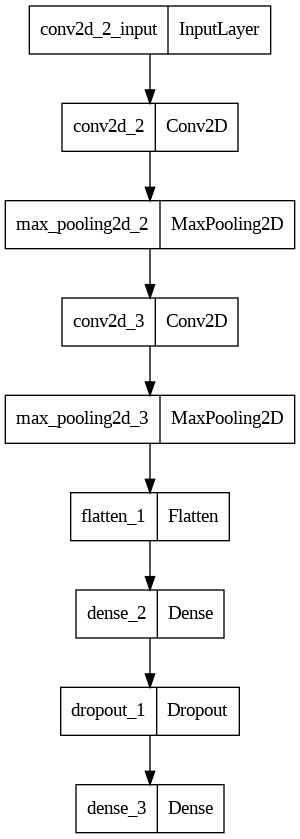

In [30]:
tf.keras.utils.plot_model(model)

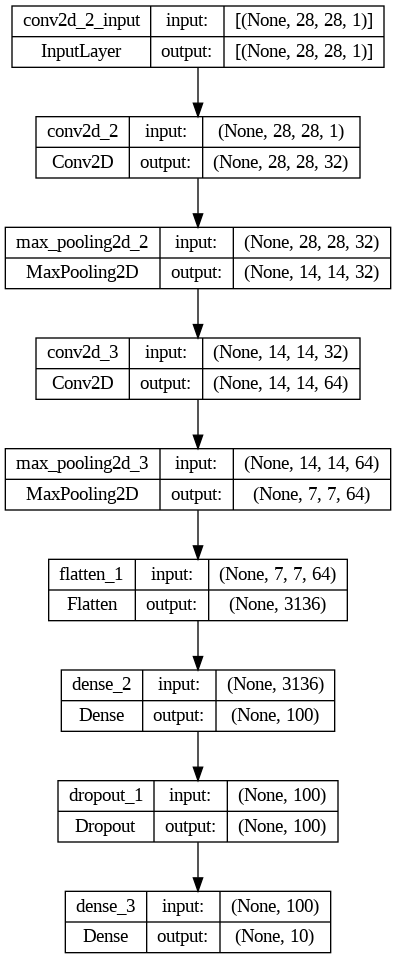

In [31]:
tf.keras.utils.plot_model(model,show_shapes=True)

In [32]:
from tensorflow.keras.losses import sparse_categorical_crossentropy


In [33]:
from keras import callbacks
model.compile(optimizer='adam',loss=sparse_categorical_crossentropy,metrics='accuracy')
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('best_cnn_model.h5', save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)
hist = model.fit(x_train,y_train,epochs=20, batch_size=50,
                 validation_data=(x_test,y_test), callbacks=[checkpoint_cb,early_stopping_cb] )

Epoch 1/20
960/960 [==============================] - 6s 5ms/step - loss: 0.5303 - accuracy: 0.8095 - val_loss: 0.3436 - val_accuracy: 0.8786
Epoch 2/20
960/960 [==============================] - 4s 4ms/step - loss: 0.3425 - accuracy: 0.8782 - val_loss: 0.2930 - val_accuracy: 0.8927
Epoch 3/20
960/960 [==============================] - 5s 5ms/step - loss: 0.2928 - accuracy: 0.8934 - val_loss: 0.2694 - val_accuracy: 0.9012
Epoch 4/20
960/960 [==============================] - 4s 4ms/step - loss: 0.2632 - accuracy: 0.9033 - val_loss: 0.2551 - val_accuracy: 0.9060
Epoch 5/20
960/960 [==============================] - 4s 4ms/step - loss: 0.2378 - accuracy: 0.9135 - val_loss: 0.2485 - val_accuracy: 0.9053
Epoch 6/20
960/960 [==============================] - 5s 5ms/step - loss: 0.2177 - accuracy: 0.9195 - val_loss: 0.2298 - val_accuracy: 0.9153
Epoch 7/20
960/960 [==============================] - 4s 4ms/step - loss: 0.2015 - accuracy: 0.9260 - val_loss: 0.2356 - val_accuracy: 0.9158
Epoch 

In [34]:
import matplotlib.pyplot as plt

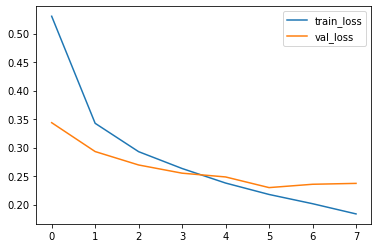

In [35]:
plt.plot(hist.history['loss'], label = 'train_loss')
plt.plot(hist.history['val_loss'], label = 'val_loss')
plt.legend()
plt.show()

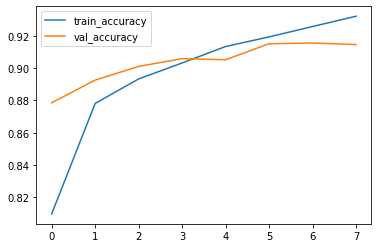

In [36]:
plt.plot(hist.history['accuracy'], label = 'train_accuracy')
plt.plot(hist.history['val_accuracy'], label = 'val_accuracy')
plt.legend()
plt.show()

In [37]:
test_input.shape

(10000, 28, 28)

In [43]:
test_input_sacled = test_input / 255.0
model.evaluate(test_input_sacled.reshape(-1,28,28,1),test_target)

313/313 [==============================] - 2s 4ms/step - loss: 0.2431 - accuracy: 0.9111


[0.24311010539531708, 0.9110999703407288]

In [65]:
import numpy as np
np.unique(test_target)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

(<matplotlib.image.AxesImage at 0x7f3b44567280>, 9)

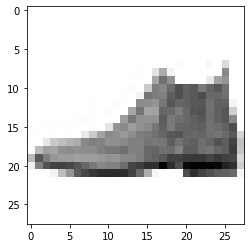

In [66]:
plt.imshow(test_input_sacled[0], cmap='gray_r'), test_target[0]

In [68]:
# x_train.shape
preds = model.predict(test_input_sacled[0].reshape(1,28,28,1))[0]
preds

1/1 [==============================] - 0s 21ms/step


array([4.4243857e-09, 4.1007402e-09, 4.7525961e-10, 8.4112323e-10,
       4.4750517e-10, 1.8032673e-05, 2.9255123e-09, 4.0599352e-04,
       1.2683267e-08, 9.9957591e-01], dtype=float32)

In [70]:
np.argmax(preds)

9

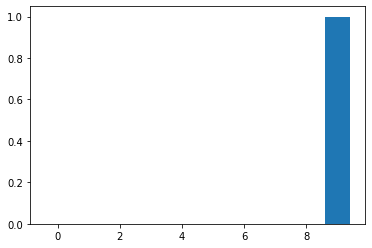

In [69]:
plt.bar(range(len(preds)),preds)
plt.show()

In [82]:
(trainx,trainy),(testx,testy) =  tf.keras.datasets.cifar10.load_data()

In [83]:
trainx.shape , train_input.shape

((50000, 32, 32, 3), (60000, 28, 28))

In [84]:
np.unique(trainy)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [86]:
trainx_scaled = trainx / 255.0
x_train,x_test,y_train,y_test =  train_test_split(trainx_scaled,trainy,test_size=0.2,random_state=0)

In [ ]:
#합성곱-폴링(최대)-밀집층
model = tf.keras.Sequential()
model.add( tf.keras.layers.Conv2D(32,3,padding='same',activation='relu', input_shape=(32,32,3)))
model.add(tf.keras.layers.Conv2D(64,3, activation='relu',padding='same' ))
model.add(tf.keras.layers.MaxPool2D(2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Conv2D(64,3, activation='relu',padding='same' ))
model.add(tf.keras.layers.Conv2D(32,3, activation='relu',padding='same' ))
model.add(tf.keras.layers.MaxPool2D(2))
model.add(tf.keras.layers.Dropout(0.3))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',loss=sparse_categorical_crossentropy,metrics='accuracy')
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('best_cnn_model.h5', save_best_only=True)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=5,restore_best_weights=True)
hist = model.fit(x_train,y_train,epochs=100,batch_size=50,
                 validation_data=(x_test,y_test), callbacks=[checkpoint_cb,early_stopping_cb] )

800/800 [==============================] - 6s 7ms/step - loss: 0.4858 - accuracy: 0.8256 - val_loss: 0.6351 - val_accuracy: 0.7900
Epoch 32/100
180/800 [=====>........................] - ETA: 4s - loss: 0.4531 - accuracy: 0.8371